In [1]:
pip install matplotlib


                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB 1.4 MB/s eta 0:00:06
                                              0.0/7.6 MB 653.6 kB/s eta 0:00:12
                                              0.1/7.6 MB 819.2 kB/s eta 0:00:10
                                              0.1/7.6 MB 774.0 kB/s eta 0:00:10
     -                                        0.2/7.6 MB 1.1 MB/s eta 0:00:07
     -                                        0.3/7.6 MB 1.0 MB/s eta 0:00:08
     -                                        0.4/7.6 MB 1.1 MB/s eta 0:00:07
     --                                       0.5/7.6 MB 1.2 MB/s eta 0:00:06
     --                                       0.5/7.6 MB 1.3 MB/s eta 0:00:06
     ---                                      0.7/7.6 MB 1.4 MB/s eta 0:00:05
     ----                                     0.8/7.6 MB 1.7 MB/s eta 0:00:05
     ----                                     1.0/7.6 MB 1.7 MB/

In [2]:
pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     ----                                    30.7/293.3 kB 1.4 MB/s eta 0:00:01
     ---------                             71.7/293.3 kB 991.0 kB/s eta 0:00:01
     ---------------                      122.9/293.3 kB 901.1 kB/s eta 0:00:01
     -----------------------------          225.3/293.3 kB 1.3 MB/s eta 0:00:01
     -------------------------------------  286.7/293.3 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [6]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "1234",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [7]:
con = PostgresConnection().getConnection()

successfully connected to database


# Q1: Find the division wise total_sale_price joining fact table and respective dimension table

In [44]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [45]:
records

[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [46]:
df_q1 = pd.DataFrame(records, columns=['division', 'sales'])
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [47]:
df_q1 =df_q1.drop(7)

In [48]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [12]:
def changetype(x):
    x['sales']=x['sales'].astype('float64')  

In [50]:
changetype(df_q1)

In [51]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [52]:
df_q1=df_q1.set_index(['division'])
df_q1

,sales
division,
BARISAL,7520343.75
CHITTAGONG,19763595.00
DHAKA,40764619.75
KHULNA,11311610.50
RAJSHAHI,12099196.00
RANGPUR,8429836.50
SYLHET,5512234.25


<Axes: ylabel='sales'>

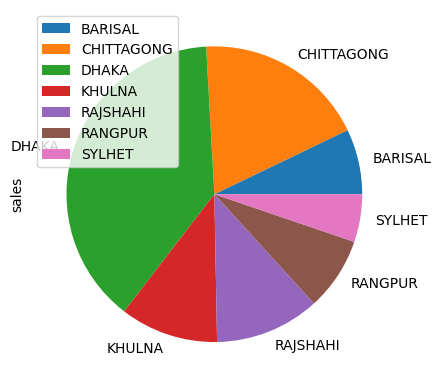

In [53]:
df_q1.plot.pie(y='sales')

<Axes: xlabel='division'>

<Figure size 1000x500 with 0 Axes>

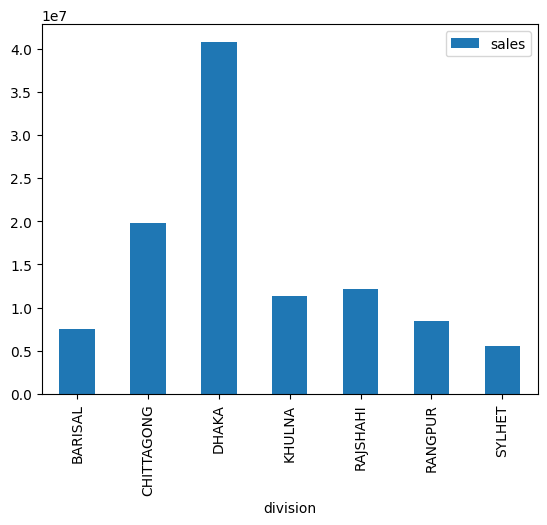

In [54]:
plt.figure(figsize=(10,5))
df_q1.plot.bar(y='sales')

In [55]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [56]:
records

[(2014, Decimal('14334731.25')),
 (2015, Decimal('15095720.25')),
 (2016, Decimal('14976508.25')),
 (2017, Decimal('15015806.00')),
 (2018, Decimal('15108197.25')),
 (2019, Decimal('14949510.25')),
 (2020, Decimal('15037190.25')),
 (2021, Decimal('883772.25')),
 (None, Decimal('105401435.75'))]

# Q1. Find the districtwise total_sale_price joining fact table and respective dimension table

In [8]:
#district-wise
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.district) " \
                "ORDER BY s.district "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [9]:
records

[('BAGERHAT', Decimal('1307651.00')),
 ('BANDARBAN', Decimal('995360.75')),
 ('BARGUNA', Decimal('869041.00')),
 ('BARISAL', Decimal('2897237.75')),
 ('BHOLA', Decimal('1012205.75')),
 ('BOGRA', Decimal('1716452.75')),
 ('BRAHMANBARIA', Decimal('1328234.25')),
 ('CHANDPUR', Decimal('1153276.75')),
 ('CHAPAI NABABGANJ', Decimal('739447.50')),
 ('CHITTAGONG', Decimal('7292985.50')),
 ('CHUADANGA', Decimal('563909.75')),
 ('COMILLA', Decimal('2286898.25')),
 ("COX'S BAZAR", Decimal('1188128.75')),
 ('DHAKA', Decimal('23597621.00')),
 ('DINAJPUR', Decimal('1871005.75')),
 ('FARIDPUR', Decimal('1287383.75')),
 ('FENI', Decimal('847873.50')),
 ('GAIBANDHA', Decimal('997077.75')),
 ('GAZIPUR', Decimal('722286.25')),
 ('GOPALGANJ', Decimal('731312.75')),
 ('HABIGANJ', Decimal('1153998.00')),
 ('JAMALPUR', Decimal('1009760.00')),
 ('JESSORE', Decimal('1132590.50')),
 ('JHALOKATI', Decimal('570807.25')),
 ('JHENAIDAH', Decimal('869991.25')),
 ('JOYPURHAT', Decimal('735378.50')),
 ('KHAGRACHHARI'

In [10]:
df_q1 = pd.DataFrame(records, columns=['district', 'sales'])
df_q1 = df_q1.set_index(['district'])
df_q1

,sales
district,
BAGERHAT,1307651.00
BANDARBAN,995360.75
BARGUNA,869041.00
BARISAL,2897237.75
BHOLA,1012205.75
...,...
SUNAMGANJ,1593774.00
SYLHET,1727717.25
TANGAIL,1774650.25


In [13]:
changetype(df_q1)

<Axes: ylabel='district'>

<Figure size 2000x2000 with 0 Axes>

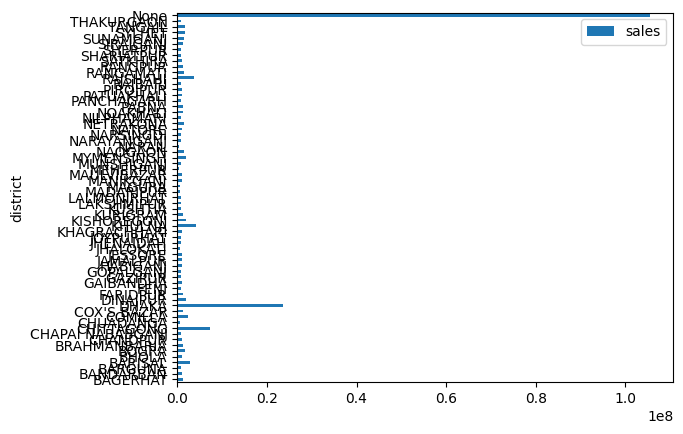

In [15]:
plt.figure(figsize=(20,20))
df_q1.plot.barh(y='sales')

# Q1. Find the yearwise total_sale_price joining fact table and respective dimension table

In [92]:
#year-wise
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [93]:
records

[(2014, Decimal('14334731.25')),
 (2015, Decimal('15095720.25')),
 (2016, Decimal('14976508.25')),
 (2017, Decimal('15015806.00')),
 (2018, Decimal('15108197.25')),
 (2019, Decimal('14949510.25')),
 (2020, Decimal('15037190.25')),
 (2021, Decimal('883772.25')),
 (None, Decimal('105401435.75'))]

In [96]:
df_q1 = pd.DataFrame(records, columns=['year', 'sales'])
df_q1

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25
8,NaN,105401435.75


In [97]:
df_q1=df_q1.drop(8)
df_q1=df_q1.set_index(['year'])
changetype(df_q1)
df_q1

,sales
year,
2014.0,14334731.25
2015.0,15095720.25
2016.0,14976508.25
2017.0,15015806.00
2018.0,15108197.25
2019.0,14949510.25
2020.0,15037190.25
2021.0,883772.25


<Axes: xlabel='year'>

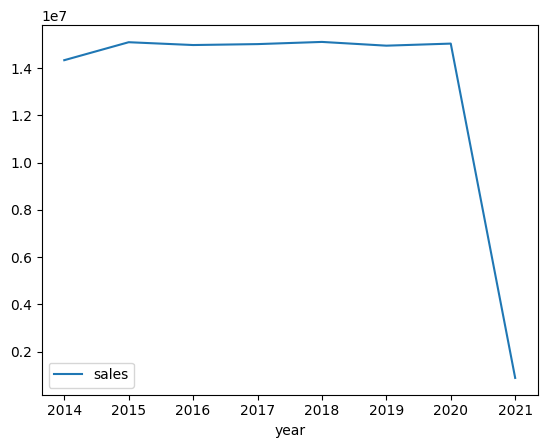

In [98]:
df_q1.plot(y=['sales'])

# Q2. Find the customerwise total_sale_price joining fact table and respective dimension table

In [24]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT c.name, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.customer_dim c on c.customer_key=t.customer_key " \
                "GROUP BY CUBE(c.name) " \
                "ORDER BY c.name "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [25]:
records

[('-', Decimal('20643.50')),
 ('aafreen fatima', Decimal('11174.75')),
 ('aafrin', Decimal('22136.75')),
 ('aafrin @ dolly', Decimal('23529.75')),
 ('aaftaab husan', Decimal('9682.00')),
 ('aakanksha', Decimal('11469.00')),
 ('aaliya', Decimal('21663.25')),
 ('aamina', Decimal('12649.25')),
 ('aamir', Decimal('10134.00')),
 ('aamir hussain', Decimal('10892.50')),
 ('aamod & pramod', Decimal('12280.25')),
 ('aamrin jahan', Decimal('11622.00')),
 ('aanamika misra', Decimal('8929.25')),
 ('aanchal', Decimal('35703.50')),
 ('aanik with her son', Decimal('8568.25')),
 ('aansi devi', Decimal('9909.00')),
 ('aanya @ china', Decimal('11443.50')),
 ('aaradhana @ priyanka', Decimal('11469.25')),
 ('aarifa bano', Decimal('11295.75')),
 ('aarifun bivi', Decimal('13139.25')),
 ('aarti', Decimal('661675.25')),
 ('aarti @ kajal', Decimal('12108.50')),
 ('aarti @ noni', Decimal('12335.50')),
 ('aarti bunkar', Decimal('13661.75')),
 ('aarti devi', Decimal('26537.00')),
 ('aarti diwakar', Decimal('10892

In [26]:
df_q1 = pd.DataFrame(records, columns=['year', 'sales'])
df_q1=df_q1.set_index(['year'])
changetype(df_q1)
df_q1

,sales
year,
-,2.064350e+04
aafreen fatima,1.117475e+04
aafrin,2.213675e+04
aafrin @ dolly,2.352975e+04
aaftaab husan,9.682000e+03
...,...
मन्जू,1.057575e+04
माया,9.862500e+03
सरोज,1.128000e+04


# Q2. Find the bankwise total_sale_price joining fact table and respective dimension table

In [80]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT t.bank_name, SUM(f.total_price) " \
              "FROM ecomdb_star_schema.fact_table f " \
              "JOIN ecomdb_star_schema.trans_dim t on t.payment_key=f.payment_key " \
                "GROUP BY CUBE(t.bank_name) " \
                "ORDER BY t.bank_name "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [81]:
records

[('AB Bank Limited', Decimal('2728515.50')),
 ('Bangladesh Commerce Bank Limited', Decimal('2730999.25')),
 ('Bank Asia Limited', Decimal('2687142.75')),
 ('Bengal Commercial Bank Ltd', Decimal('2704554.25')),
 ('Bkash', Decimal('2689352.50')),
 ('BRAC Bank Limited', Decimal('2705795.75')),
 ('Citizens Bank Limited', Decimal('2723215.25')),
 ('City Bank Limited', Decimal('2713952.50')),
 ('Community Bank Bangladesh Limited', Decimal('2685751.50')),
 ('Dhaka Bank Limited', Decimal('2728366.00')),
 ('Dutch-Bangla Bank Limited', Decimal('2692435.25')),
 ('Eastern Bank Limited', Decimal('2687182.25')),
 ('IFIC Bank Limited', Decimal('2699759.75')),
 ('Jamuna Bank Limited', Decimal('2689886.50')),
 ('Meghna Bank Limited', Decimal('2700528.50')),
 ('Mercantile Bank Limited', Decimal('2676578.50')),
 ('Midland Bank Limited', Decimal('2688430.25')),
 ('Modhumoti Bank Limited', Decimal('2715279.00')),
 ('Mutual Trust Bank Limited', Decimal('2670030.50')),
 ('Nagad', Decimal('2699554.50')),
 ('N

In [88]:
df_q1 = pd.DataFrame(records, columns=['bank_name', 'sales'])
df_q1

,bank_name,sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


In [89]:
df_q1=df_q1.drop(39)
df_q1 = df_q1.set_index(['bank_name'])
changetype(df_q1)

<Axes: xlabel='bank_name'>

<Figure size 2000x2000 with 0 Axes>

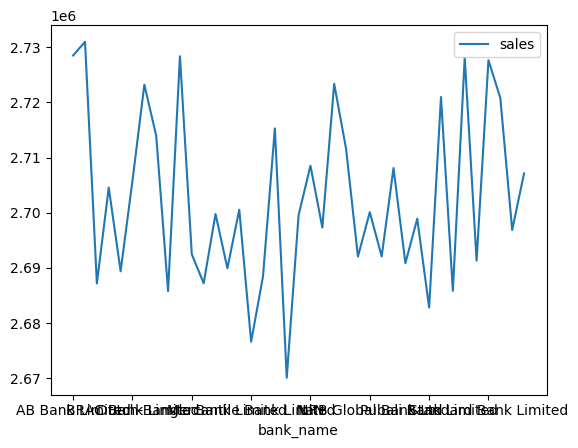

In [91]:
plt.figure(figsize=(20,20))
df_q1.plot(y='sales')

# Q2. Find the transaction(cash/online) wise total_sale_price joining fact table and respective dimension table

In [35]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT t.trans_type, SUM(f.total_price) " \
              "FROM ecomdb_star_schema.fact_table f " \
              "JOIN ecomdb_star_schema.trans_dim t on t.payment_key=f.payment_key " \
                "GROUP BY CUBE(t.trans_type) " \
                "ORDER BY t.trans_type "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [36]:
records

[('card', Decimal('94583038.50')),
 ('cash', Decimal('2708515.75')),
 ('mobile', Decimal('8109881.50')),
 (None, Decimal('105401435.75'))]

In [37]:
df_q1 = pd.DataFrame(records, columns=['trans_type', 'sales'])
df_q1 = df_q1.set_index(['trans_type'])
changetype(df_q1)
df_q1

,sales
trans_type,
card,9.458304e+07
cash,2.708516e+06
mobile,8.109882e+06
None,1.054014e+08


<Axes: ylabel='sales'>

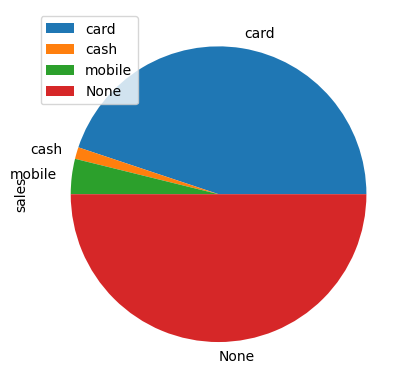

In [38]:
df_q1.plot.pie(y='sales')

# Q3. Total sales in Barisal

In [40]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key AND s.division = 'BARISAL' " \
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', Decimal('7520343.75')), (None, Decimal('7520343.75'))]

In [49]:
df_q3 = pd.DataFrame(records, columns=['division', 'sales'])
changetype(df_q3)
df_q3

,division,sales
0,BARISAL,7520343.75
1,None,7520343.75


In [50]:
df_q3 =df_q3.drop(1)
df_q3

,division,sales
0,BARISAL,7520343.75


# Q4. Total sales in 2015

In [51]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key AND s.year = 2015 " \
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(2015, Decimal('15095720.25')), (None, Decimal('15095720.25'))]

In [52]:
df_q4 = pd.DataFrame(records, columns=['year', 'sales'])
changetype(df_q4)
df_q4

,year,sales
0,2015.0,15095720.25
1,NaN,15095720.25


In [53]:
df_q4 =df_q4.drop(1)
df_q4

,year,sales
0,2015.0,15095720.25


# Q5. Total sales of Barisal in 2015

In [58]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, t.year, SUM(fact.total_price) " \
              "FROM ecomdb_star_schema.fact_table fact " \
              "JOIN ecomdb_star_schema.time_dim t on fact.time_key=t.time_key " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=fact.store_key " \
              "WHERE t.year = 2015 AND s.division = 'BARISAL' " \
              "GROUP BY CUBE(t.year, s.division)"
                
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', 2015, Decimal('1076902.75')),
 (None, 2015, Decimal('1076902.75')),
 (None, None, Decimal('1076902.75')),
 ('BARISAL', None, Decimal('1076902.75'))]

In [67]:
df_q5 = pd.DataFrame(records, columns=['division', 'year', 'sales'])
changetype(df_q5)
df_q5

,division,year,sales
0,BARISAL,2015.0,1076902.75
1,None,2015.0,1076902.75
2,None,NaN,1076902.75
3,BARISAL,NaN,1076902.75


In [79]:
df_q5.iloc[0:1]

,division,year,sales
0,BARISAL,2015.0,1076902.75
